In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

/Users/nethikasuraweera/Documents/ping_github/v_env/lstm/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:

df = pd.read_csv("data.csv")

In [17]:
df.head()

,gap,addr,rxtx,subaddr,count,data
0,93134.6,7,False,1,10,48b93dc901e443c4fab151cb1cc4cd58d469de23
1,11.7,7,False,2,5,cb1f36e5d457f78a14a6
2,11.7,7,False,6,25,efe76a30f55010989d264c7d213c4225ee1bdf5f91b71c...
3,11.7,7,False,30,2,88830b3d
4,11.7,7,True,3,32,8c370935ffb387bc22895e9c028648e3676553f7ccb258...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9886 entries, 0 to 9885
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gap      9886 non-null   float64
 1   addr     9886 non-null   int64  
 2   rxtx     9886 non-null   bool   
 3   subaddr  9886 non-null   int64  
 4   count    9886 non-null   int64  
 5   data     9886 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 396.0+ KB


In [15]:
df.describe()

,gap,addr,subaddr,count
count,9.886000e+03,9886.000000,9886.000000,9886.000000
mean,3.440052e+03,3.056241,14.542282,10.565446
std,2.689463e+04,2.498370,11.943451,9.881448
min,1.160000e+01,1.000000,1.000000,2.000000
25%,1.170000e+01,1.000000,2.000000,2.000000
50%,1.170000e+01,1.000000,16.000000,5.000000
75%,2.640000e+01,4.000000,30.000000,16.000000
max,2.074854e+06,7.000000,30.000000,32.000000


# count

In [10]:
df['count'].describe()

count    9886.000000
mean       10.565446
std         9.881448
min         2.000000
25%         2.000000
50%         5.000000
75%        16.000000
max        32.000000
Name: count, dtype: float64

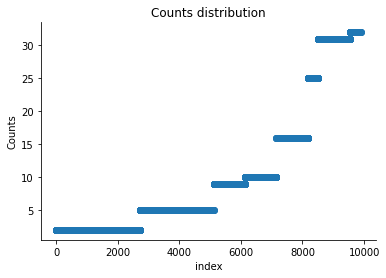

In [11]:
plt.scatter(range(df.shape[0]), np.sort(df['count'].values))
plt.xlabel('index')
plt.ylabel('Counts')
plt.title("Counts distribution")
sns.despine()

/Users/nethikasuraweera/Documents/ping_github/v_env/lstm/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


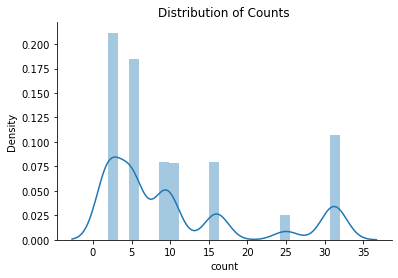

In [19]:
sns.distplot(df['count'])
plt.title("Distribution of Counts")
sns.despine()

In [14]:
print("Skewness: %f" % df['count'].skew())
print("Kurtosis: %f" % df['count'].kurt())

Skewness: 1.177322
Kurtosis: 0.023662


# gap

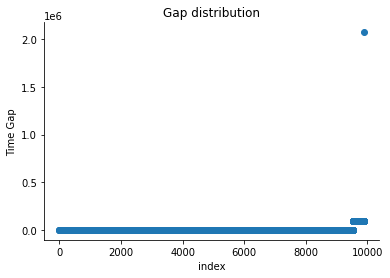

In [24]:
plt.scatter(range(df.shape[0]), np.sort(df['gap'].values))
plt.xlabel('index')
plt.ylabel('Time Gap')
plt.title("Gap distribution")
sns.despine()

/Users/nethikasuraweera/Documents/ping_github/v_env/lstm/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


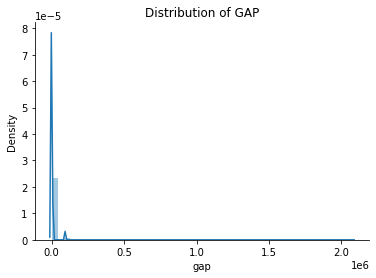

In [25]:
sns.distplot(df['gap'])
plt.title("Distribution of GAP")
sns.despine()

In [27]:
print("Skewness: %f" % df['gap'].skew())
print("Kurtosis: %f" % df['gap'].kurt())

Skewness: 47.509746
Kurtosis: 3563.266501


# Saperate RT to BC and BC rtomRC

/Users/nethikasuraweera/Documents/ping_github/v_env/lstm/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'traffic'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


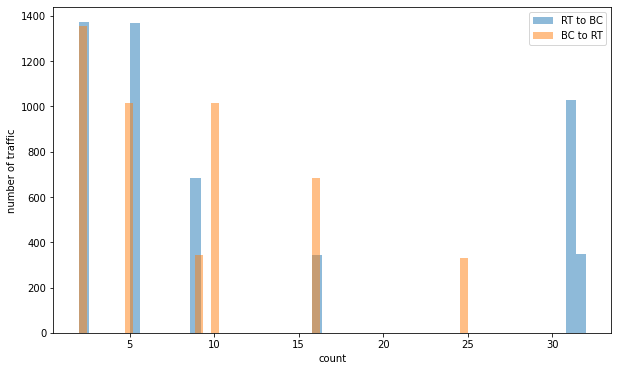

In [18]:

a = data_df.loc[data_df['rxtx'] == True, 'count']
b = data_df.loc[data_df['rxtx'] == False, 'count']
plt.figure(figsize=(10, 6))
plt.hist(a, bins = 50, alpha=0.5, label='RT to BC')
plt.hist(b, bins = 50, alpha=0.5, label='BC to RT')
plt.legend(loc='traffic')
plt.xlabel('count')
plt.ylabel('number of traffic')
plt.show();

In [20]:
a

4       32
5       31
6        2
9       16
10      31
        ..
9881     9
9882     5
9883     5
9884     2
9885     2
Name: count, Length: 5142, dtype: int64

In [21]:
rt_bc = data_df.loc[data_df['rxtx'] == True]
bc_rt = data_df.loc[data_df['rxtx'] == False]

In [22]:
rt_bc

,gap,addr,rxtx,subaddr,count,data
4,11.7,7,True,3,32,8c370935ffb387bc22895e9c028648e3676553f7ccb258...
5,11.7,7,True,20,31,7a27520eeb0a3f685997f62bdfa325e3dd7e60a8abb4e0...
6,11.7,7,True,30,2,942ea145
9,11.6,4,True,19,16,3b712816c9d95e28bbd92cc68821fbe8eb67971e13dd36...
10,11.7,4,True,20,31,ceb3b7a32382e6c4829f5adde8be43d81e02d136718083...
...,...,...,...,...,...,...
9881,26.4,1,True,3,9,633ff1f01730b89c986a5b656dbf692daa37
9882,11.7,1,True,20,5,3cb8f650f02aea4bd6d6
9883,26.4,1,True,20,5,85e4d39d1391a4f92036
9884,11.7,1,True,30,2,3cb98b6d


In [23]:
bc_rt

,gap,addr,rxtx,subaddr,count,data
0,93134.6,7,False,1,10,48b93dc901e443c4fab151cb1cc4cd58d469de23
1,11.7,7,False,2,5,cb1f36e5d457f78a14a6
2,11.7,7,False,6,25,efe76a30f55010989d264c7d213c4225ee1bdf5f91b71c...
3,11.7,7,False,30,2,88830b3d
7,11.7,4,False,16,9,f8ec89d326f1c09f5642db53cf42d2445e33
...,...,...,...,...,...,...
9873,26.4,1,False,2,5,b200b50fd12c10352b3e
9874,11.7,1,False,6,16,5c0f258a7bf1015a85e03646c07a54a5c515655d5dc0a1...
9875,26.4,1,False,6,16,7a06a6fd3b2411b3a21cd4f1ed72271f81d7f8804efd72...
9876,11.7,1,False,30,2,d9b65c5d


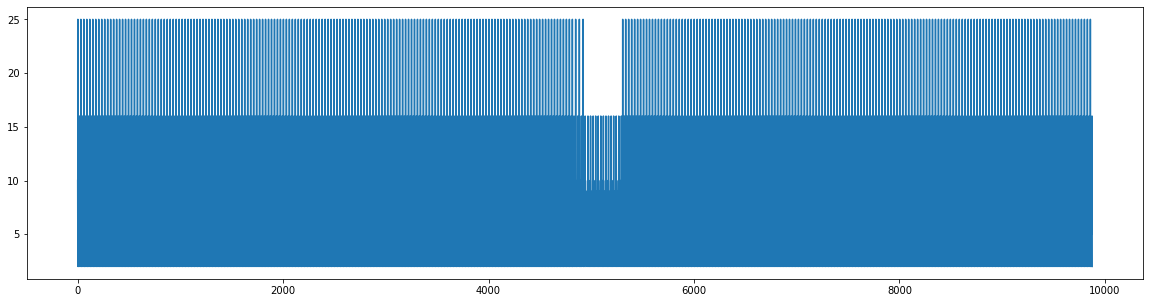

In [29]:
bc_rt['count'].plot(figsize=(20,5))

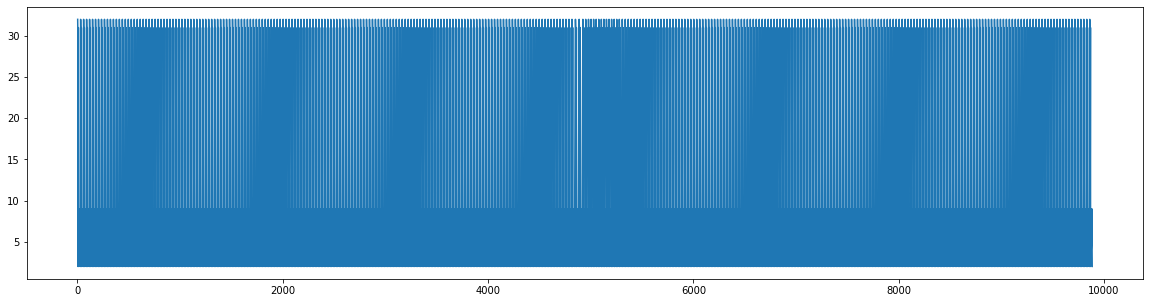

In [28]:
rt_bc['count'].plot(figsize=(20,5))

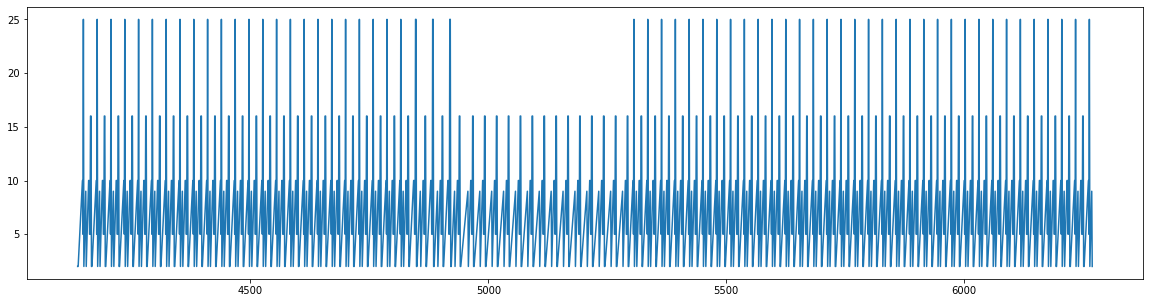

In [41]:
bc_rt['count'][2000:3000].plot(figsize=(20,5))

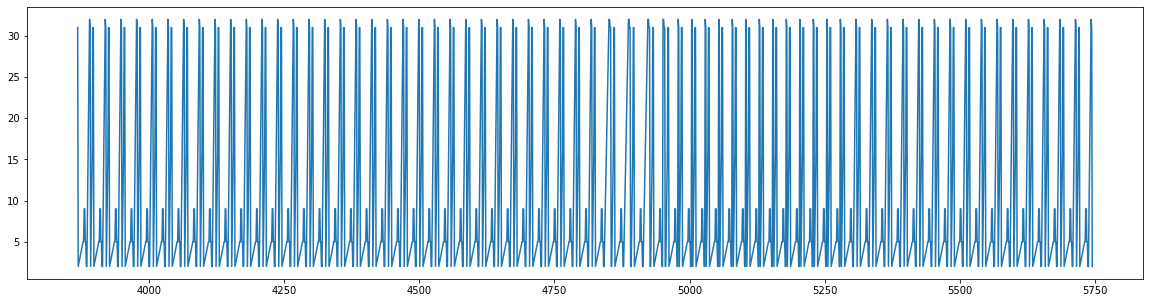

In [42]:
rt_bc['count'][2000:3000].plot(figsize=(20,5))

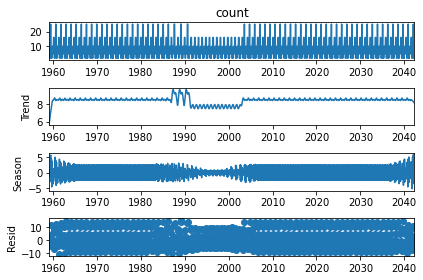

In [55]:
from statsmodels.tsa.seasonal import STL
#BC to RT
counts = list(bc_rt['count'][2000:3000])
counts = pd.Series(counts, index=pd.date_range('1-1-1959', periods=len(counts), freq='M'), name = 'count')
stl = STL(counts, seasonal=13)
res = stl.fit()
fig = res.plot()

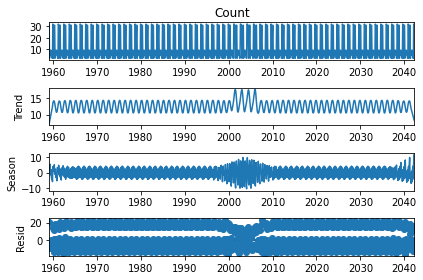

In [74]:
#RT to BC
counts = list(rt_bc['count'][2000:3000])
counts = pd.Series(counts, index=pd.date_range('1-1-1959', periods=len(counts), freq='M'), name = 'Count')
stl = STL(counts, seasonal=13)
res = stl.fit()
fig = res.plot()

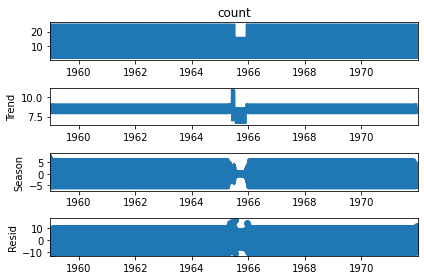

In [57]:
#BC to RT
counts = list(bc_rt['count'])
counts = pd.Series(counts, index=pd.date_range('1-1-1959', periods=len(counts), freq='D'), name = 'count')
stl = STL(counts, seasonal=13)
res = stl.fit()
fig = res.plot()

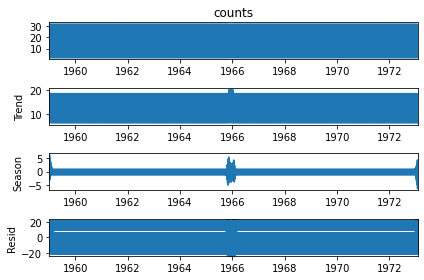

In [59]:
#RT to BC
counts = list(rt_bc['count'])
counts = pd.Series(counts, index=pd.date_range('1-1-1959', periods=len(counts), freq='D'), name = 'counts')
stl = STL(counts, seasonal=13)
res = stl.fit()
fig = res.plot()

In [60]:
bc_rt

,gap,addr,rxtx,subaddr,count,data
0,93134.6,7,False,1,10,48b93dc901e443c4fab151cb1cc4cd58d469de23
1,11.7,7,False,2,5,cb1f36e5d457f78a14a6
2,11.7,7,False,6,25,efe76a30f55010989d264c7d213c4225ee1bdf5f91b71c...
3,11.7,7,False,30,2,88830b3d
7,11.7,4,False,16,9,f8ec89d326f1c09f5642db53cf42d2445e33
...,...,...,...,...,...,...
9873,26.4,1,False,2,5,b200b50fd12c10352b3e
9874,11.7,1,False,6,16,5c0f258a7bf1015a85e03646c07a54a5c515655d5dc0a1...
9875,26.4,1,False,6,16,7a06a6fd3b2411b3a21cd4f1ed72271f81d7f8804efd72...
9876,11.7,1,False,30,2,d9b65c5d


In [33]:
set(rt_bc['count'])

{2, 5, 9, 16, 31, 32}

In [34]:
set(bc_rt['count'])

{2, 5, 9, 10, 16, 25}

# Anomaly Detection

# i - Forest

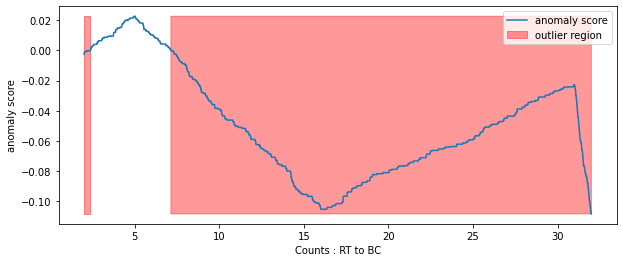

In [35]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(rt_bc['count'].values.reshape(-1, 1))
xx = np.linspace(rt_bc['count'].min(), rt_bc['count'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Counts : RT to BC')
plt.show();

In [70]:
rt_bc.loc[rt_bc['count'] > ].head()

,gap,addr,rxtx,subaddr,count,data
4,11.7,7,True,3,32,8c370935ffb387bc22895e9c028648e3676553f7ccb258...
5,11.7,7,True,20,31,7a27520eeb0a3f685997f62bdfa325e3dd7e60a8abb4e0...
9,11.6,4,True,19,16,3b712816c9d95e28bbd92cc68821fbe8eb67971e13dd36...
10,11.7,4,True,20,31,ceb3b7a32382e6c4829f5adde8be43d81e02d136718083...
11,11.7,4,True,26,31,f4f667f32051c0a43584dd883fe194a50bbaee34776e40...


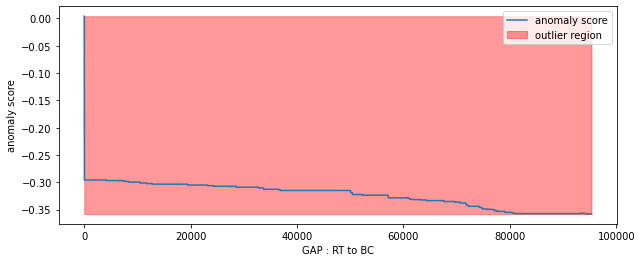

In [64]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(rt_bc['gap'].values.reshape(-1, 1))
xx = np.linspace(rt_bc['gap'].min(), rt_bc['gap'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('GAP : RT to BC')
plt.show();

In [69]:
rt_bc.loc[rt_bc['gap'] > 20000].head(10)

,gap,addr,rxtx,subaddr,count,data
4951,93234.8,7,True,3,32,55019cefecd1e4a659dae51a08accda3ade266b423f716...
4979,95349.5,7,True,3,32,d49437a6d1aa1af8e48f3dd183b5a6fb0199c0d34c5acd...
5004,94286.7,7,True,3,32,d9251fd568ac4663684d818ce658a4335a430eb152d271...
5029,94260.6,7,True,3,32,5d1a0f7445b9e6f9143cb4622c28530d1088c5f8ee954e...
5054,94192.0,7,True,3,32,9e9bfe140b14d85922189b878f380b9183e23e35924d91...
5079,94276.7,7,True,3,32,c05b5004b123bede84d62d8d1301f9b0de0e84511f676f...
5104,94220.7,7,True,3,32,fdcc9eab36a3b99318ec09a2140700466c0fa854ab5be6...
5129,94183.6,7,True,3,32,5d09fa4030c0e99619a5ba7e90e3c12d1794a08d647708...
5154,94188.7,7,True,3,32,ee2ee67fe674c2669d0cd817764f709fcbd80edbd4d39a...
5179,94200.9,7,True,3,32,a461f136a5cd1bb75bcb2d3adcf221b70fd7c01c7e225e...


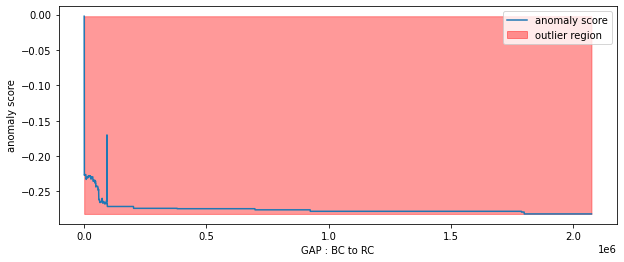

In [65]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(bc_rt['gap'].values.reshape(-1, 1))
xx = np.linspace(bc_rt['gap'].min(), bc_rt['gap'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('GAP : BC to RC')
plt.show();

In [77]:
bc_rt.loc[bc_rt['gap'] > 20000].head(20)

,gap,addr,rxtx,subaddr,count,data
0,93134.6,7,False,1,10,48b93dc901e443c4fab151cb1cc4cd58d469de23
29,93149.5,7,False,1,10,35ab3444fed6b32fbb002ce2c76b3a65cb67f8e5
58,93175.8,7,False,1,10,5c720dcc2b86d12fd3a4a5ec936e39edf2fcf4e3
87,93172.4,7,False,1,10,c9b01bcd32bfe2f8ff8e8608f87f39d036568cdf
116,93100.4,7,False,1,10,6663668fd9ee28e78a97ceb11f7693427ad0f627
145,93129.9,7,False,1,10,37e2a447e36b01e0df613117e92716aa8e433411
174,93119.8,7,False,1,10,aa59152f1dd0f8ca267e2ee165efee21e7b47c5d
203,93217.5,7,False,1,10,d5fb2877b1ec7f88c5c062a87b4dd1503830246f
232,93089.7,7,False,1,10,4da6470d021fd6b3ff804407259958f23347e5f4
261,93248.2,7,False,1,10,314fe3a83776d93d846d13e94973768690161202


# Try Pattern anomaly detection